# Множественная линейная регрессия на чистых данных

### Задания для выполнения

1) Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

2) Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

3) Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

4) Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

5) Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

6) Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

### №2

In [2]:
X = pd.read_csv('1_x.csv', header=None)
Y = pd.read_csv('1_y.csv', header=None)

In [3]:
X

,0,1,2,3,4,5,6
0,1.599865,0.340598,-0.603400,0.150586,-0.209677,0.955045,0.347682
1,1.472656,0.466832,-1.947130,0.625906,0.589354,0.753521,-2.138552
2,0.279378,-1.717121,0.251069,0.730013,0.301801,-0.206711,0.894811
3,0.450771,1.133196,-0.294028,-2.595338,0.313911,1.953527,0.359938
4,1.507042,0.932115,-0.789549,1.043712,-1.404000,-0.124354,-0.921117
...,...,...,...,...,...,...,...
120,1.018825,1.618920,-1.561572,1.057171,1.893181,-0.647510,1.220188
121,-1.244391,0.327816,-1.004231,-1.877654,1.307478,-1.839689,-0.176182
122,-1.968106,-0.054336,0.558046,-0.527741,-0.060449,0.531740,-0.374088
123,-0.970556,0.436830,0.877973,-0.970337,-0.282711,-1.464295,-0.976662


In [4]:
Y

,0
0,101.507602
1,-65.305680
2,152.189336
3,-109.702103
4,-11.188624
...,...
120,293.947002
121,-146.511266
122,-143.163481
123,-188.233401


### №3

#### X

In [5]:
X.info

<bound method DataFrame.info of             0         1         2         3         4         5         6
0    1.599865  0.340598 -0.603400  0.150586 -0.209677  0.955045  0.347682
1    1.472656  0.466832 -1.947130  0.625906  0.589354  0.753521 -2.138552
2    0.279378 -1.717121  0.251069  0.730013  0.301801 -0.206711  0.894811
3    0.450771  1.133196 -0.294028 -2.595338  0.313911  1.953527  0.359938
4    1.507042  0.932115 -0.789549  1.043712 -1.404000 -0.124354 -0.921117
..        ...       ...       ...       ...       ...       ...       ...
120  1.018825  1.618920 -1.561572  1.057171  1.893181 -0.647510  1.220188
121 -1.244391  0.327816 -1.004231 -1.877654  1.307478 -1.839689 -0.176182
122 -1.968106 -0.054336  0.558046 -0.527741 -0.060449  0.531740 -0.374088
123 -0.970556  0.436830  0.877973 -0.970337 -0.282711 -1.464295 -0.976662
124  1.755678  0.028767  1.631109 -1.209245  0.004220 -0.196236  0.093187

[125 rows x 7 columns]>

In [6]:
X.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

In [7]:
X.mean()

0   -0.046701
1    0.173034
2    0.049015
3   -0.005271
4   -0.095981
5   -0.107452
6   -0.056552
dtype: float64

#### Y

In [8]:
Y.info

<bound method DataFrame.info of               0
0    101.507602
1    -65.305680
2    152.189336
3   -109.702103
4    -11.188624
..          ...
120  293.947002
121 -146.511266
122 -143.163481
123 -188.233401
124   76.381467

[125 rows x 1 columns]>

In [9]:
Y.dtypes

0    float64
dtype: object

In [10]:
Y.mean()

0   -10.905182
dtype: float64

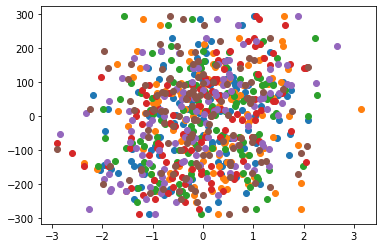

In [11]:
plt.figure()
[plt.scatter(X[i], Y) for i in range(6)]
plt.show()

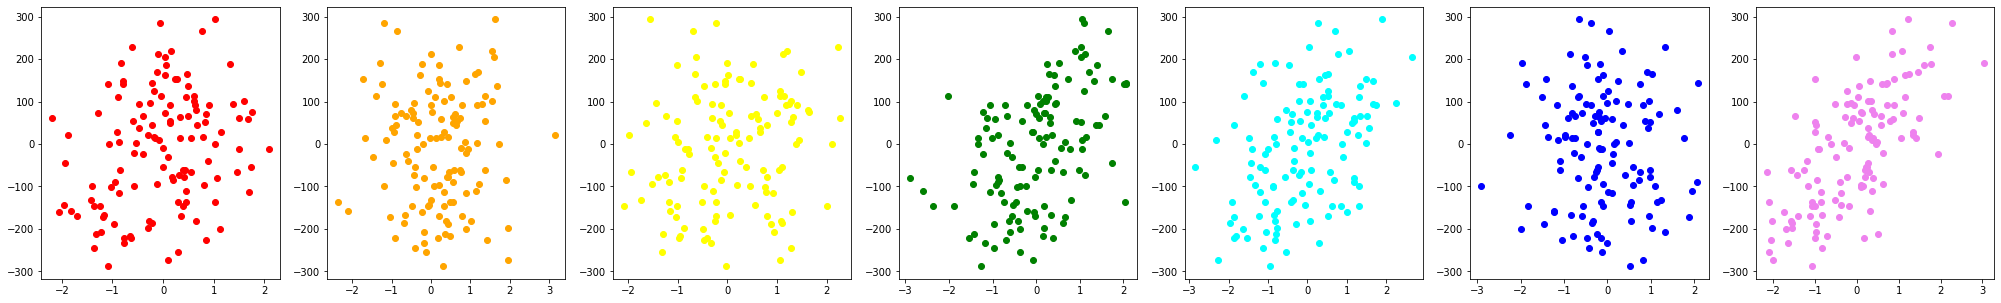

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(35, 5))
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(X[0], Y, c="red")
ax2.scatter(X[1], Y, c="orange")
ax3.scatter(X[2], Y, c="yellow")
ax4.scatter(X[3], Y, c="green")
ax5.scatter(X[4], Y, c="cyan")
ax6.scatter(X[5], Y, c="blue")
ax7.scatter(X[6], Y, c="violet")
plt.show()

Мы видим что хорошая корреляция у нас наблюдается у четвертого признака из датасета X и датасета Y, а так же самая лучшая у 6 признака из датасета X и датасета Y. 

### №4

In [13]:
# x_r = np.array(X[6]).reshape(-1, 1)
# y_r = np.array(Y).reshape(-1, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [31]:
X_train[0]

124    1.755678
91    -0.480577
35     0.388306
116    0.189008
19     0.454784
         ...   
102    0.780244
98     0.295936
92    -1.229713
66     0.180496
109   -0.185674
Name: 0, Length: 100, dtype: float64

### №5

#### Y и X[1]

In [65]:
model_1 = linear_model.LinearRegression()
x_tr_1 = X_train[0].values.reshape(-1,1)
y_tr_1 = y_train.values
model_1.fit(x_tr_1, y_tr_1)

LinearRegression()

In [66]:
print("The R-squared value is: {0:0.4f} \n".format(model_1.score(x_tr_1, y_tr_1)))

The R-squared value is: 0.0608 



In [67]:
print(f'Коэффициент корреляции {np.round(model_1.score(x_tr_1, y_tr_1), 4)} показывает что корреляция между тренировочными признаками слабая')

Коэффициент корреляции 0.0608 показывает что корреляция между тренировочными признаками слабая


In [68]:
x_tst_1 = X_test[0].values.reshape(-1,1)
y_tst_1 = y_test.values
predicted_1 = model_1.predict(x_tst_1)
predicted_1

array([[ 50.71245151],
       [-12.66824935],
       [ 58.97150167],
       [-15.62763382],
       [-44.23984371],
       [  6.86004568],
       [-10.44542521],
       [ 19.06988607],
       [  0.76096868],
       [-28.55693277],
       [ 15.16500906],
       [-14.90505233],
       [  7.65970732],
       [-57.81054036],
       [-34.20250491],
       [ 54.13826325],
       [ 17.67728821],
       [ -1.14555912],
       [ 37.54955413],
       [-48.4289624 ],
       [ 33.29485029],
       [ 13.11751444],
       [-42.68171243],
       [-22.38541038],
       [-77.5448665 ]])

In [69]:
mae = np.mean(abs(predicted_1-y_tst_1))
rmse = np.sqrt(np.mean((predicted_1-y_tst_1)**2))
rae = np.mean(abs(predicted_1-y_tst_1))/np.mean(abs(y_tst_1-np.mean(y_tst_1)))
rse = np.mean((predicted_1-y_tst_1)**2)/np.mean((y_tst_1-np.mean(y_tst_1))**2)

In [70]:
print("The R-squared value is: {0:0.4f}".format(model_1.score(x_tst_1, y_tst_1))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.0620
Mean Absolute Error: 94.680349
Root Mean Squared Error: 117.800008
Relative Absolute Error: 0.924824
Relative Squared Error: 0.938010


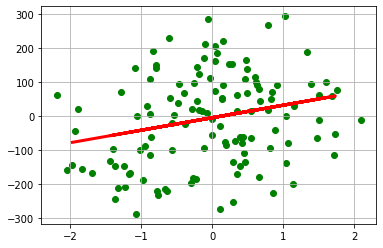

In [71]:
plt.scatter(X[0], Y, color="green")
plt.grid(linestyle='-')
plt.plot(X_test[0].values, predicted_1, color="r", linewidth=3)
plt.show()

#### Y и X[2]

In [78]:
model_2 = linear_model.LinearRegression()
x_tr_2 = X_train[1].values.reshape(-1,1)
y_tr_2 = y_train.values
model_2.fit(x_tr_2, y_tr_2)

LinearRegression()

In [79]:
print(f'Коэффициент корреляции {np.round(model_2.score(x_tr_2, y_tr_2), 4)} показывает что корреляция между тренировочными признаками слабая')

Коэффициент корреляции 0.0001 показывает что корреляция между тренировочными признаками слабая


In [80]:
x_tst_2 = X_test[1].values.reshape(-1,1)
y_tst_2 = y_test.values
predicted_2 = model_2.predict(x_tst_2)
predicted_2

array([[ -6.2146445 ],
       [ -6.67408028],
       [ -7.55342116],
       [ -8.18963801],
       [ -7.94740642],
       [ -8.29466927],
       [-10.21511786],
       [ -6.09359444],
       [ -5.24895808],
       [ -9.03329864],
       [ -7.6930592 ],
       [ -7.04087404],
       [ -6.77352542],
       [ -7.6364765 ],
       [ -9.54879799],
       [ -7.11847272],
       [ -5.26196645],
       [ -4.66020157],
       [ -9.07196623],
       [ -9.21660566],
       [ -5.0120822 ],
       [ -9.03289824],
       [ -8.22819001],
       [ -9.05137438],
       [ -7.72192566]])

In [81]:
mae = np.mean(abs(predicted_2-y_tst_2))
rmse = np.sqrt(np.mean((predicted_2-y_tst_2)**2))
rae = np.mean(abs(predicted_2-y_tst_2))/np.mean(abs(y_tst_2-np.mean(y_tst_2)))
rse = np.mean((predicted_2-y_tst_2)**2)/np.mean((y_tst_2-np.mean(y_tst_2))**2)

In [82]:
print("The R-squared value is: {0:0.4f}".format(model_2.score(x_tst_2, y_tst_2))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: -0.0219
Mean Absolute Error: 99.238564
Root Mean Squared Error: 122.956862
Relative Absolute Error: 0.969348
Relative Squared Error: 1.021933


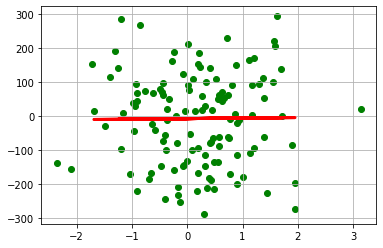

In [83]:
plt.scatter(X[1], Y, color="green")
plt.grid(linestyle='-')
plt.plot(X_test[1].values, predicted_2, color="r", linewidth=3)
plt.show()

#### Y и X[3]

In [86]:
model_3 = linear_model.LinearRegression()
x_tr_3 = X_train[2].values.reshape(-1,1)
y_tr_3 = y_train.values
model_3.fit(x_tr_3, y_tr_3)

LinearRegression()

In [87]:
print(f'Коэффициент корреляции {np.round(model_3.score(x_tr_3, y_tr_3), 4)} показывает что корреляция между тренировочными признаками слабая')

Коэффициент корреляции 0.0244 показывает что корреляция между тренировочными признаками слабая


In [88]:
x_tst_3 = X_test[2].values.reshape(-1,1)
y_tst_3 = y_test.values
predicted_3 = model_3.predict(x_tst_3)
predicted_3

array([[-24.68092028],
       [ 10.81439164],
       [ 17.51159766],
       [ -3.40359854],
       [ 23.76709061],
       [-35.11289791],
       [-11.98874963],
       [ 16.95325106],
       [ 19.59386641],
       [-16.23021459],
       [ -6.06981317],
       [-12.48989648],
       [ 22.45036713],
       [-45.87589673],
       [ -8.18473085],
       [-20.53646679],
       [ 21.52338794],
       [ 16.48097693],
       [  7.27662858],
       [-30.00483141],
       [ 39.51444203],
       [-34.70556097],
       [  9.51389558],
       [ 20.46301194],
       [  5.32208314]])

In [89]:
mae = np.mean(abs(predicted_3-y_tst_3))
rmse = np.sqrt(np.mean((predicted_3-y_tst_3)**2))
rae = np.mean(abs(predicted_3-y_tst_3))/np.mean(abs(y_tst_3-np.mean(y_tst_3)))
rse = np.mean((predicted_3-y_tst_3)**2)/np.mean((y_tst_3-np.mean(y_tst_3))**2)

In [90]:
print("The R-squared value is: {0:0.4f}".format(model_3.score(x_tst_3, y_tst_3))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.0017
Mean Absolute Error: 97.218454
Root Mean Squared Error: 121.529506
Relative Absolute Error: 0.949616
Relative Squared Error: 0.998344


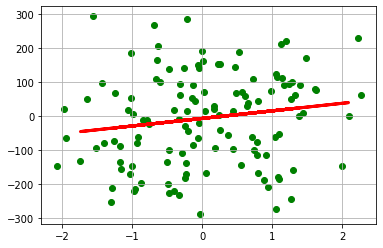

In [91]:
plt.scatter(X[2], Y, color="green")
plt.grid(linestyle='-')
plt.plot(X_test[2].values, predicted_3, color="r", linewidth=3)
plt.show()

#### Y и X[4]

In [92]:
model_4 = linear_model.LinearRegression()
x_tr_4 = X_train[3].values.reshape(-1,1)
y_tr_4 = y_train.values
model_4.fit(x_tr_4, y_tr_4)

LinearRegression()

In [94]:
print(f'Коэффициент корреляции {np.round(model_4.score(x_tr_4, y_tr_4), 4)} показывает что корреляция между тренировочными признаками слабая')

Коэффициент корреляции 0.2292 показывает что корреляция между тренировочными признаками слабая


In [95]:
x_tst_4 = X_test[3].values.reshape(-1,1)
y_tst_4 = y_test.values
predicted_4 = model_4.predict(x_tst_4)
predicted_4

array([[  62.89417552],
       [  88.30683676],
       [ -30.22953338],
       [ -62.05186085],
       [   5.16670946],
       [  67.69632322],
       [  -1.28193034],
       [ -31.57703336],
       [  53.24882285],
       [-104.44086258],
       [ -70.48428383],
       [ -44.78964839],
       [  15.30708827],
       [  47.35390972],
       [ 128.21627666],
       [   4.96349631],
       [  10.26915057],
       [  -9.27349309],
       [ -11.37856492],
       [  37.96425419],
       [ -91.6100735 ],
       [  97.38599478],
       [ -33.68718145],
       [   1.11391536],
       [ -39.0347132 ]])

In [96]:
mae = np.mean(abs(predicted_4-y_tst_4))
rmse = np.sqrt(np.mean((predicted_4-y_tst_4)**2))
rae = np.mean(abs(predicted_4-y_tst_4))/np.mean(abs(y_tst_4-np.mean(y_tst_4)))
rse = np.mean((predicted_4-y_tst_4)**2)/np.mean((y_tst_4-np.mean(y_tst_4))**2)

In [97]:
print("The R-squared value is: {0:0.4f}".format(model_4.score(x_tst_4, y_tst_4))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.1191
Mean Absolute Error: 94.740142
Root Mean Squared Error: 114.157951
Relative Absolute Error: 0.925408
Relative Squared Error: 0.880905


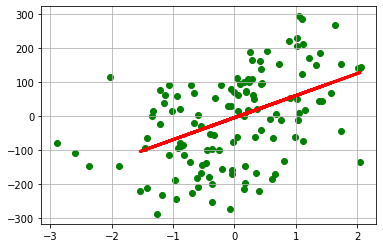

In [98]:
plt.scatter(X[3], Y, color="green")
plt.grid(linestyle='-')
plt.plot(X_test[3].values, predicted_4, color="r", linewidth=3)
plt.show()

#### Y и X[5]

In [100]:
model_5 = linear_model.LinearRegression()
x_tr_5 = X_train[4].values.reshape(-1,1)
y_tr_5 = y_train.values
model_5.fit(x_tr_5, y_tr_5)

LinearRegression()

In [102]:
print(f'Коэффициент корреляции {np.round(model_5.score(x_tr_5, y_tr_5), 4)} показывает что корреляция между тренировочными признаками слабая')

Коэффициент корреляции 0.1693 показывает что корреляция между тренировочными признаками слабая


In [103]:
x_tst_5 = X_test[4].values.reshape(-1,1)
y_tst_5 = y_test.values
predicted_5 = model_5.predict(x_tst_5)
predicted_5

array([[ -81.82169257],
       [-106.86563881],
       [-159.80822629],
       [  63.75900596],
       [  42.77183516],
       [ -17.18555022],
       [ -85.57589347],
       [ -49.66240397],
       [  51.31822938],
       [ -88.15265858],
       [   6.5027629 ],
       [  -1.43543967],
       [   8.1847679 ],
       [ -25.73085609],
       [ -16.82632439],
       [ -17.02207703],
       [  -1.87038182],
       [-128.27760719],
       [  48.87279053],
       [-106.7948718 ],
       [ -48.13874753],
       [  66.59142763],
       [ -52.81118933],
       [  85.51114606],
       [  -8.925508  ]])

In [105]:
mae = np.mean(abs(predicted_5-y_tst_5))
rmse = np.sqrt(np.mean((predicted_5-y_tst_5)**2))
rae = np.mean(abs(predicted_5-y_tst_5))/np.mean(abs(y_tst_5-np.mean(y_tst_5)))
rse = np.mean((predicted_5-y_tst_5)**2)/np.mean((y_tst_5-np.mean(y_tst_5))**2)

In [106]:
print("The R-squared value is: {0:0.4f}".format(model_5.score(x_tst_5, y_tst_5))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.2850
Mean Absolute Error: 88.005585
Root Mean Squared Error: 102.850745
Relative Absolute Error: 0.859626
Relative Squared Error: 0.715042


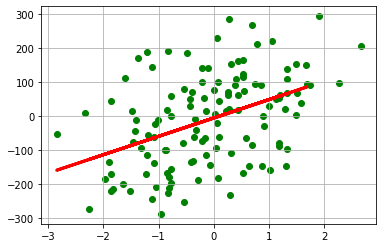

In [107]:
plt.scatter(X[4], Y, color="green")
plt.grid(linestyle='-')
plt.plot(X_test[4].values, predicted_5, color="r", linewidth=3)
plt.show()

#### Y и X[6]

In [108]:
model_6 = linear_model.LinearRegression()
x_tr_6 = X_train[5].values.reshape(-1,1)
y_tr_6 = y_train.values
model_6.fit(x_tr_6, y_tr_6)

LinearRegression()

In [109]:
print(f'Коэффициент корреляции {np.round(model_6.score(x_tr_6, y_tr_6), 4)} показывает что корреляция между тренировочными признаками слабая')

Коэффициент корреляции 0.0005 показывает что корреляция между тренировочными признаками слабая


In [110]:
x_tst_6 = X_test[5].values.reshape(-1,1)
y_tst_6 = y_test.values
predicted_6 = model_6.predict(x_tst_6)
predicted_6

array([[ -7.32556043],
       [-11.58776611],
       [ -7.64156384],
       [-14.15832807],
       [ -8.45520321],
       [ -5.63833459],
       [ -1.19507281],
       [ -5.18055345],
       [ -5.84706047],
       [ -8.44993884],
       [ -9.58673134],
       [ -8.01533308],
       [ -7.51278683],
       [ -2.90183178],
       [-13.00162663],
       [ -3.83780993],
       [ -6.2926361 ],
       [ -4.23455974],
       [ -7.61472575],
       [ -0.83051944],
       [ -6.41761705],
       [ -7.81636465],
       [ -8.35186609],
       [ -8.48883704],
       [ -5.20559257]])

In [111]:
mae = np.mean(abs(predicted_6-y_tst_6))
rmse = np.sqrt(np.mean((predicted_6-y_tst_6)**2))
rae = np.mean(abs(predicted_6-y_tst_6))/np.mean(abs(y_tst_6-np.mean(y_tst_6)))
rse = np.mean((predicted_6-y_tst_6)**2)/np.mean((y_tst_6-np.mean(y_tst_6))**2)

In [112]:
print("The R-squared value is: {0:0.4f}".format(model_6.score(x_tst_6, y_tst_6))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: -0.0399
Mean Absolute Error: 100.154223
Root Mean Squared Error: 124.034792
Relative Absolute Error: 0.978292
Relative Squared Error: 1.039930


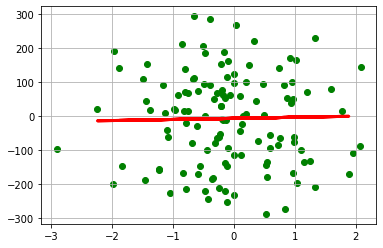

In [113]:
plt.scatter(X[5], Y, color="green")
plt.grid(linestyle='-')
plt.plot(X_test[5].values, predicted_6, color="r", linewidth=3)
plt.show()

#### Y и X[7]

In [115]:
model_7 = linear_model.LinearRegression()
x_tr_7 = X_train[6].values.reshape(-1,1)
y_tr_7 = y_train.values
model_7.fit(x_tr_7, y_tr_7)

LinearRegression()

In [116]:
print(f'Коэффициент корреляции {np.round(model_7.score(x_tr_7, y_tr_7), 4)} показывает что корреляция между тренировочными признаками слабая')

Коэффициент корреляции 0.495 показывает что корреляция между тренировочными признаками слабая


In [117]:
x_tst_7 = X_test[6].values.reshape(-1,1)
y_tst_7 = y_test.values
predicted_7 = model_7.predict(x_tst_7)
predicted_7

array([[ -89.2836673 ],
       [  44.324867  ],
       [  13.85708828],
       [  18.37350605],
       [ -62.60234267],
       [-134.05607557],
       [ 117.96753857],
       [-188.11166204],
       [  89.55456073],
       [   9.11132274],
       [  28.35649796],
       [-146.71855374],
       [ -31.18041767],
       [ -52.71658222],
       [  45.96814796],
       [  23.81572471],
       [  16.40486765],
       [-185.6862646 ],
       [ -95.87405424],
       [ -45.55803106],
       [  34.44324129],
       [-137.78404076],
       [   2.37452881],
       [ -28.33480634],
       [ -40.52211292]])

In [118]:
mae = np.mean(abs(predicted_7-y_tst_7))
rmse = np.sqrt(np.mean((predicted_7-y_tst_7)**2))
rae = np.mean(abs(predicted_7-y_tst_7))/np.mean(abs(y_tst_7-np.mean(y_tst_7)))
rse = np.mean((predicted_7-y_tst_7)**2)/np.mean((y_tst_7-np.mean(y_tst_7))**2)

In [119]:
print("The R-squared value is: {0:0.4f}".format(model_7.score(x_tst_7, y_tst_7))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.3050
Mean Absolute Error: 85.379486
Root Mean Squared Error: 101.397970
Relative Absolute Error: 0.833975
Relative Squared Error: 0.694985


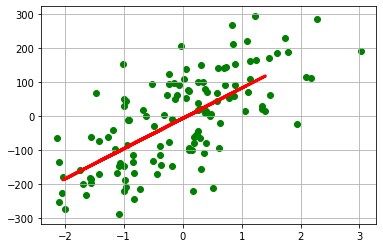

In [120]:
plt.scatter(X[6], Y, color="green")
plt.grid(linestyle='-')
plt.plot(X_test[6].values, predicted_7, color="r", linewidth=3)
plt.show()

### Множественная (по всем столбцам X)

In [72]:
# # Split the dataset: 80% vs 20% 
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [121]:
lm_multiple = linear_model.LinearRegression()
lm_multiple.fit(X_train, y_train)

LinearRegression()

In [123]:
print("The R-squared value is: {0:0.4f} \n".format(lm_multiple.score(X_train, y_train)))

The R-squared value is: 0.9953 



In [124]:
predicted = lm_multiple.predict(X_test)
predicted

array([[ -23.23319802],
       [  50.45763197],
       [ -54.3583359 ],
       [  23.1159156 ],
       [ -10.05291448],
       [ -63.35925475],
       [  24.10754292],
       [-181.59140832],
       [ 250.57346062],
       [-222.24763695],
       [   3.85023991],
       [-186.66252953],
       [  64.61702523],
       [-120.25297205],
       [ 139.06889349],
       [  96.60647131],
       [ 105.86348876],
       [-266.31883782],
       [  43.75806327],
       [-178.81273485],
       [   4.4171741 ],
       [  62.30729812],
       [-106.20627699],
       [  88.96138657],
       [-157.62757426]])

In [127]:
mae1 = np.mean(abs(predicted-y_test))
rmse1 = np.sqrt(np.mean((predicted-y_test)**2))
rae1 = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse1 = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [129]:
print("The R-squared value is: {0:0.4f}".format(lm_multiple.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae1[0])) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse1[0])) 
print("Relative Absolute Error: {0:0.6f}".format(rae1[0])) 
print("Relative Squared Error: {0:0.6f}".format(rse1[0])) 

The R-squared value is: 0.9937
Mean Absolute Error: 7.396176
Root Mean Squared Error: 9.682292
Relative Absolute Error: 0.072245
Relative Squared Error: 0.006337


### Какие метрики эффективности можно применять для оценки регрессионных моделей?
Среднеквадратичная ошибка (RMSE) и средняя абсолютная ошибка (MAE). Эти показатели говорят нам, насколько точны наши прогнозы и какова величина отклонения от фактических значений.

Технически, RMSE — это корень среднего квадрата ошибок, а MAE — Средняя абсолютная ошибка (или среднее абсолютное отклонение) -  определяет среднее абсолютное расстояние между прогнозируемыми и целевыми значениями.

MSE
«Среднеквадратическая ошибка» -  находит среднеквадратичную ошибку между прогнозируемыми и фактическими значениями.

MAE более устойчив к выбросам, чем MSE.  в MSE путем возведения в квадрат ошибок, выбросы (которые обычно имеют более высокие ошибки, чем другие выборки) получают больше внимания и доминируют в окончательной ошибке и влияют на параметры модели.

Коэффициент детерминации (R2) – наиболее распространённая статистика для оценки качества модели

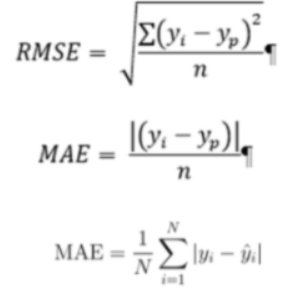
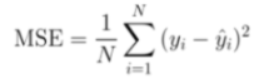
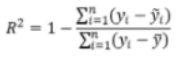

### Дополнительные задания

1) Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

2) Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.

3) Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

4) (*) Замерьте время обучения на разных объемах данных и количестве признаков. Сделайте вывод о зависимости скорости обучения от объема обучающей выборки.

In [78]:
p2 = PolynomialFeatures(degree=2)
p3 = PolynomialFeatures(degree=3)
p10 = PolynomialFeatures(degree=10)
svt1=pd.DataFrame(columns=['Полином','Данные','R^2','MSE','MeaAE','MedAE', 'RMSE'])
svt2=pd.DataFrame(columns=['Полином','Данные','R^2','MSE','MeaAE','MedAE', 'RMSE'])
svt3=pd.DataFrame(columns=['Полином','Данные','R^2','MSE','MeaAE','MedAE', 'RMSE'])

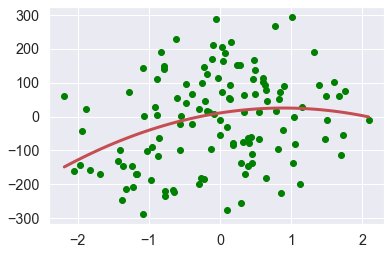

In [81]:
x1_tr=p2.fit_transform(X_train[0].values.reshape(-1,1))
x1_te=p2.fit_transform(X_test[0].values.reshape(-1,1))
r = linear_model.LinearRegression().fit(x1_tr, y_train)
x=np.linspace(min(X_train[0]),max(X_train[0]))
y_pred = r.predict(p2.fit_transform(x.reshape(-1,1)))
plt.scatter(X[0].values, Y, color="green")
plt.plot(x, y_pred, color="r", linewidth=3)
plt.show()

In [84]:
x1_tr=p2.fit_transform(X_train[0].values.reshape(-1,1))
x1_te=p2.fit_transform(X_test[0].values.reshape(-1,1))
y_pred1 = r.predict(x1_tr)
y_pred2 = r.predict(x1_te)
r2_tr = r2_score(y_train,y_pred1)
MSE_tr = mean_squared_error(y_train,y_pred1)
MeaAE_tr = mean_absolute_error(y_train,y_pred1)
MedAE_tr = median_absolute_error(y_train,y_pred1)
RMSE_tr = np.sqrt(MSE_tr)
r2_te = r2_score(y_test,y_pred2)
MSE_te = mean_squared_error(y_test,y_pred2)
MeaAE_te = mean_absolute_error(y_test,y_pred2)
MedAE_te = median_absolute_error(y_test,y_pred2)
RMSE_te = np.sqrt(MSE_te)
svt11 = pd.DataFrame([['2-й степени','Train',r2_tr, MSE_tr,MeaAE_tr,MedAE_tr, RMSE_tr]],columns = ['Полином','Данные','R^2','MSE','MeaAE','MedAE', 'RMSE'])
svt1 = pd.concat([svt1,svt11],ignore_index=True)
svt12 = pd.DataFrame([['2-й степени','Test',r2_te, MSE_te,MeaAE_te,MedAE_te, RMSE_te]],columns = ['Полином','Данные','R^2','MSE','MeaAE','MedAE', 'RMSE'])
svt1 = pd.concat([svt1,svt12],ignore_index=True)
svt1

,Полином,Данные,R^2,MSE,MeaAE,MedAE,RMSE
0,2-й степени,Train,0.080793,17506.757463,111.939088,98.179751,132.313104
1,2-й степени,Test,0.087449,13500.204332,88.240872,59.161774,116.190380
2,2-й степени,Train,0.080793,17506.757463,111.939088,98.179751,132.313104
3,2-й степени,Test,0.087449,13500.204332,88.240872,59.161774,116.190380
